Populating the interactive namespace from numpy and matplotlib


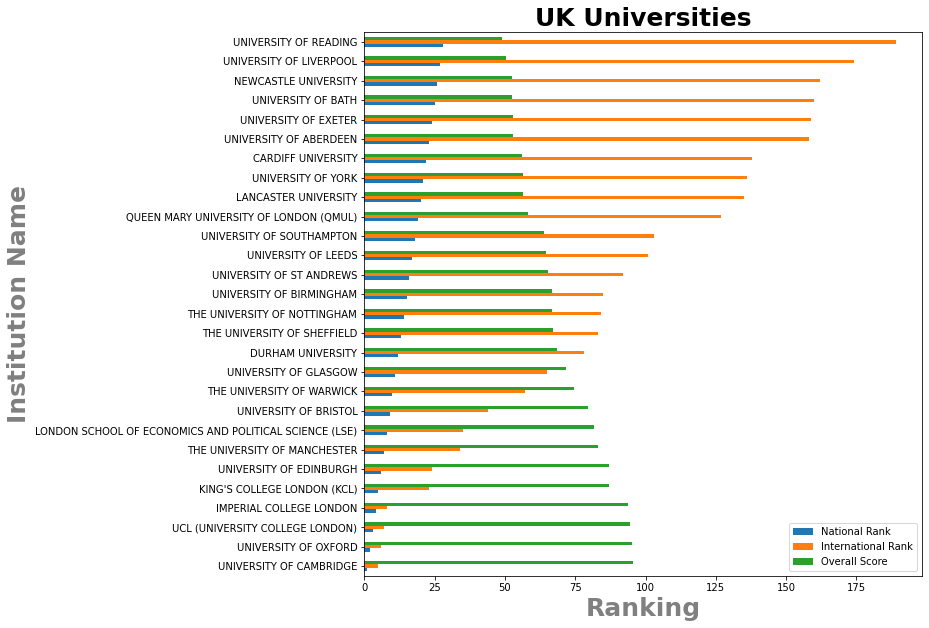

,Location,Rank,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score
Institution Name,,,,,,,,,
MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,1,100.0,100.0,100.0,99.9,100.0,96.1,100.0
STANFORD UNIVERSITY,United States,2,100.0,100.0,100.0,99.4,99.6,72.7,98.7
HARVARD UNIVERSITY,United States,3,100.0,100.0,98.3,99.9,96.5,75.2,98.4
CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,4,99.5,85.4,100.0,100.0,93.4,89.2,97.7
UNIVERSITY OF CAMBRIDGE,United Kingdom,5,100.0,100.0,100.0,78.3,97.4,97.7,95.6
UNIVERSITY OF OXFORD,United Kingdom,6,100.0,100.0,100.0,76.3,98.6,98.5,95.3
UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,7,99.7,99.5,99.1,74.7,96.6,100.0,94.6
IMPERIAL COLLEGE LONDON,United Kingdom,8,99.4,100.0,100.0,68.7,100.0,100.0,93.7
UNIVERSITY OF CHICAGO,United States,9,99.9,92.9,96.5,85.9,71.9,79.8,93.5


In [1]:
# CELL1 – 3 marks
################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################
data = pd.read_excel('2018-QS-World-University-Rankings-Top200.xlsx', index_col=0)

Data_uk = data[(data.Location == 'United Kingdom')]
Data_uk = Data_uk.rename(columns={'Rank': 'International Rank'}) #newline
Data_uk.insert(0, 'National Rank', range(1, 1 + len(Data_uk)))  #newline
imortant_uk= Data_uk[["National Rank","International Rank","Overall Score"]] #newline
imortant_uk.plot.barh(figsize=(10,10))
#plt.style.use('ggplot')
plt.title('UK Universities', fontsize=25,weight = 'bold')
plt.ylabel('Institution Name',fontsize=25,weight = 'bold').set_color('gray')
plt.xlabel('Ranking', fontsize=25,weight = 'bold').set_color('gray')
plt.show()
result = data.head(10)
result

Usually bars are provided to indicate the uncertainty in the estimate; in these cases, using the margin of error is appropriate. The margin of error is the half width of a (usually 95%) confidence interval.So bars showing the margin of error around the point estimate represent the confidence interval.


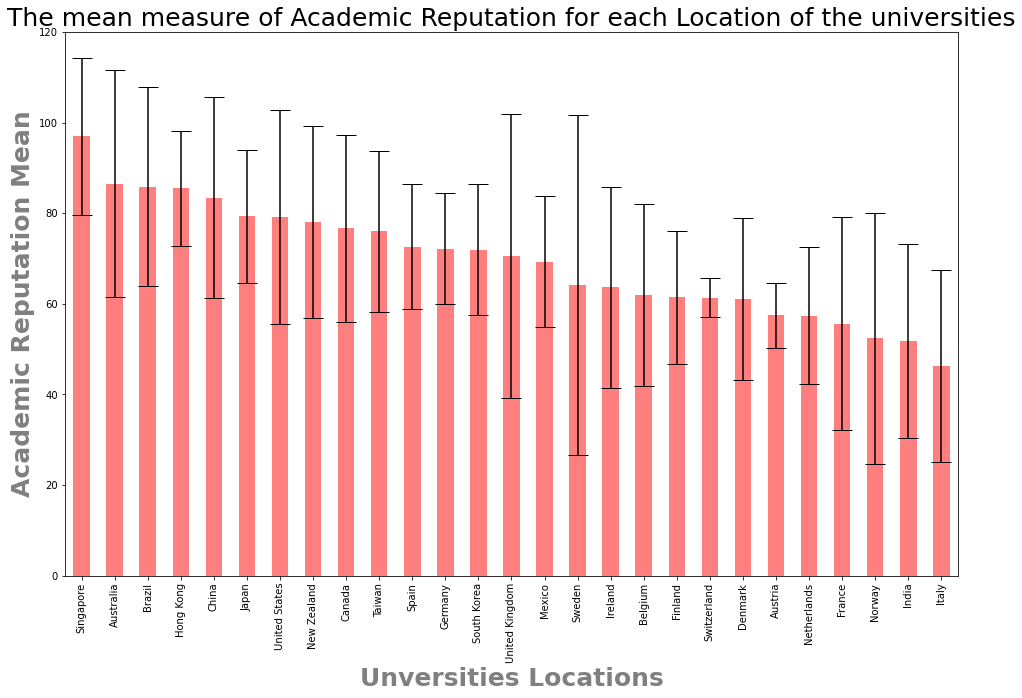

In [6]:
# CELL2 – 3 marks

#exclude any Location containing less than two institutions
filtered_data = data[data['Location'].map(data['Location'].value_counts()) > 1]


#Find Mean and std of Academic Reputation for each Location
MEAN = filtered_data.groupby(['Location'])['Academic Reputation'].agg("mean").to_frame()
STD = filtered_data.groupby(['Location'])['Academic Reputation'].agg("std").to_frame()


Res_Data = MEAN.join(STD,on='Location', how='left', lsuffix='_MEAN', rsuffix='_STD')

# convert the std columns to an array
yerr = Res_Data[['Academic Reputation_STD']].to_numpy().T


Res_Data['Academic Reputation_MEAN'].sort_values(ascending=False).plot(figsize=(16,10), kind='bar', yerr=yerr, alpha=0.5, linestyle='-', color='red', capsize=10)


plt.title('The mean measure of Academic Reputation for each Location of the universities', fontsize=25)
plt.ylabel('Academic Reputation Mean',fontsize=25,weight = 'bold').set_color('gray')
plt.xlabel('Unversities Locations', fontsize=25,weight = 'bold').set_color('gray')
print ("""Usually bars are provided to indicate the uncertainty in the estimate; in these cases, using the margin of error is appropriate. The margin of error is the half width of a (usually 95%) confidence interval.So bars showing the margin of error around the point estimate represent the confidence interval.""")

plt.show()



In [7]:
# Preparing Train Data
NOT_UK = data[data.Location != 'United Kingdom']
Train_Data = NOT_UK.drop(columns=['Location','Employer Reputation', 'International Faculty','International Students'])

# Preparing Test Data
UK = data[data.Location == 'United Kingdom']
Test_Data = UK.drop(columns=['Location','Employer Reputation', 'International Faculty','International Students'])

Y = Train_Data['Overall Score']
 
X1 = Train_Data.drop(['Overall Score','Rank','Faculty Student'], axis=1) 
X2 = Train_Data.drop(['Overall Score','Rank','Citations per Faculty'], axis=1) 
X3 = Train_Data.drop(['Overall Score','Rank', 'Academic Reputation'], axis=1) 
X4 = Train_Data.drop(['Overall Score','Academic Reputation','Citations per Faculty'], axis=1) 
X5 = Train_Data.drop(['Overall Score','Faculty Student', 'Citations per Faculty'], axis=1)
X6 = Train_Data.drop(['Overall Score','Academic Reputation','Faculty Student'], axis=1)
X7 = Train_Data.drop(['Overall Score','Rank'], axis=1)
X8 = Train_Data.drop(['Overall Score','Academic Reputation'], axis=1) 
X9 = Train_Data.drop(['Overall Score','Faculty Student'], axis=1) 
X10 = Train_Data.drop(['Overall Score','Citations per Faculty'], axis=1)  
X11 = Train_Data.drop(['Overall Score'], axis=1) 



Y=Y.astype(float)


model1 = sm.OLS(Y, sm.add_constant(X1.astype(float)), missing='drop')
result1 = model1.fit()

model2 = sm.OLS(Y, sm.add_constant(X2.astype(float)), missing='drop')
result2 = model2.fit()
 
model3 = sm.OLS(Y, sm.add_constant(X3.astype(float)), missing='drop')
result3 = model3.fit()
 
model4 = sm.OLS(Y, sm.add_constant(X4.astype(float)), missing='drop')
result4 = model4.fit()
 
model5 = sm.OLS(Y, sm.add_constant(X5.astype(float)), missing='drop')
result5 = model5.fit()
 
model6 = sm.OLS(Y, sm.add_constant(X6.astype(float)), missing='drop')
result6 = model6.fit()
 
model7 = sm.OLS(Y, sm.add_constant(X7.astype(float)), missing='drop')
result7 = model7.fit()
 
model8 = sm.OLS(Y, sm.add_constant(X8.astype(float)), missing='drop')
result8 = model8.fit()
 
model9 = sm.OLS(Y, sm.add_constant(X9.astype(float)), missing='drop')
result9 = model9.fit()
 
model10 = sm.OLS(Y, sm.add_constant(X10.astype(float)), missing='drop')
result10 = model10.fit()
 
model11 = sm.OLS(Y, sm.add_constant(X11.astype(float)), missing='drop')
result11 = model11.fit()

# Models' Equations

E1 = '{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result1.params.values[1],2),' Academic Reputation'," + ",round(result1.params.values[2],2),' Citations per Faculty')
E2 = '{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result2.params.values[1],2),' Academic Reputation'," + ",round(result2.params.values[2],2),' Faculty Student')
E3 = '{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result3.params.values[1],2),' Faculty Student'," + ",round(result3.params.values[2],2),' Citations per Faculty')
E4 = '{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result4.params.values[1],2),' Rank'," + ",round(result4.params.values[2],2),' Faculty Student')
E5 = '{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result5.params.values[1],2),' Rank'," + ",round(result5.params.values[2],2),' Academic Reputation')
E6 = '{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result6.params.values[1],2),' Rank'," + ",round(result6.params.values[2],2),' Citations per Faculty')
E7 = '{}{}{}{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result7.params.values[1],2),' Academic Reputation'," + ",round(result7.params.values[2],2),' Faculty Student'," + ",round(result7.params.values[3],2),' Citations per Faculty')
E8 = '{}{}{}{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result8.params.values[1],2),' Rank'," + ",round(result8.params.values[2],2),' Faculty Student'," + ",round(result8.params.values[3],2),' Citations per Faculty')
E9 = '{}{}{}{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result9.params.values[1],2),' Rank'," + ",round(result9.params.values[2],2),' Academic Reputation'," + ",round(result9.params.values[3],2),' Citations per Faculty')
E10 = '{}{}{}{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result10.params.values[1],2),' Rank'," + ",round(result10.params.values[2],2),' Academic Reputation'," + ",round(result10.params.values[3],2),' Faculty Student')
E11 = '{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}'.format("Overall Score"," = ",1," + ",round(result11.params.values[1],2),' Rank'," + ",round(result11.params.values[2],2),' Academic Reputation'," + ",round(result11.params.values[3],2),' Faculty Student'," + ",round(result11.params.values[4],2),' Citations per Faculty')


# Get MSE

X_new1 = Test_Data.drop(['Overall Score','Rank','Faculty Student'], axis=1) 
X_new2 = Test_Data.drop(['Overall Score','Rank','Citations per Faculty'], axis=1) 
X_new3 = Test_Data.drop(['Overall Score','Rank', 'Academic Reputation'], axis=1) 
X_new4 = Test_Data.drop(['Overall Score','Academic Reputation','Citations per Faculty'], axis=1) 
X_new5 = Test_Data.drop(['Overall Score','Faculty Student', 'Citations per Faculty'], axis=1)
X_new6 = Test_Data.drop(['Overall Score','Academic Reputation','Faculty Student'], axis=1)
X_new7 = Test_Data.drop(['Overall Score','Rank'], axis=1)
X_new8 = Test_Data.drop(['Overall Score','Academic Reputation'], axis=1) 
X_new9 = Test_Data.drop(['Overall Score','Faculty Student'], axis=1) 
X_new10 = Test_Data.drop(['Overall Score','Citations per Faculty'], axis=1)  
X_new11 = Test_Data.drop(['Overall Score'], axis=1) 


Y_new = Test_Data['Overall Score']

Y_new=Y_new.astype(float)


mse1= np.mean((Y_new - result1.predict(sm.add_constant(X_new1)))**2)
mse2= np.mean((Y_new - result2.predict(sm.add_constant(X_new2)))**2)
mse3= np.mean((Y_new - result3.predict(sm.add_constant(X_new3)))**2)
mse4= np.mean((Y_new - result4.predict(sm.add_constant(X_new4)))**2)
mse5= np.mean((Y_new - result5.predict(sm.add_constant(X_new5)))**2)
mse6= np.mean((Y_new - result6.predict(sm.add_constant(X_new6)))**2)
mse7= np.mean((Y_new - result7.predict(sm.add_constant(X_new7)))**2)
mse8= np.mean((Y_new - result8.predict(sm.add_constant(X_new8)))**2)
mse9= np.mean((Y_new - result9.predict(sm.add_constant(X_new9)))**2)
mse10= np.mean((Y_new - result10.predict(sm.add_constant(X_new10)))**2)
mse11= np.mean((Y_new - result11.predict(sm.add_constant(X_new11)))**2)
       

L= [mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10,mse11]

Eq= [E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11]

rounded_L = list(np.around(np.array(L),2))

MSE = pd.DataFrame(rounded_L, columns =['MSE'])

Equations = pd.DataFrame(Eq, columns =['Equations of Models'])

Super_Result = pd.concat([Equations, MSE],axis = 1, join = 'outer', ignore_index=False, sort=False)

Super_Result['MSE'] = Super_Result['MSE'].astype(str)
Super_Result['MSE'].fillna(value='0')

Super_Result.style

# Conclusion: we should use model11 that contains 4 variables "predictors" to get the best output value corresponding to the smallest error.

C:\Users\Naim Rihan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Equations of Models,MSE
0,Overall Score = 1 + 0.49 Academic Reputation + 0.19 Citations per Faculty,49.2
1,Overall Score = 1 + 0.52 Academic Reputation + 0.18 Faculty Student,22.45
2,Overall Score = 1 + 0.2 Faculty Student + 0.27 Citations per Faculty,117.92
3,Overall Score = 1 + -0.23 Rank + 0.02 Faculty Student,8.82
4,Overall Score = 1 + -0.23 Rank + 0.01 Academic Reputation,9.74
5,Overall Score = 1 + -0.23 Rank + 0.03 Citations per Faculty,9.81
6,Overall Score = 1 + 0.49 Academic Reputation + 0.21 Faculty Student + 0.22 Citations per Faculty,24.71
7,Overall Score = 1 + -0.22 Rank + 0.03 Faculty Student + 0.04 Citations per Faculty,8.36
8,Overall Score = 1 + -0.22 Rank + 0.03 Academic Reputation + 0.03 Citations per Faculty,9.52
9,Overall Score = 1 + -0.22 Rank + 0.04 Academic Reputation + 0.03 Faculty Student,7.91


NOTE,the work is based on the alternative LBP calculation


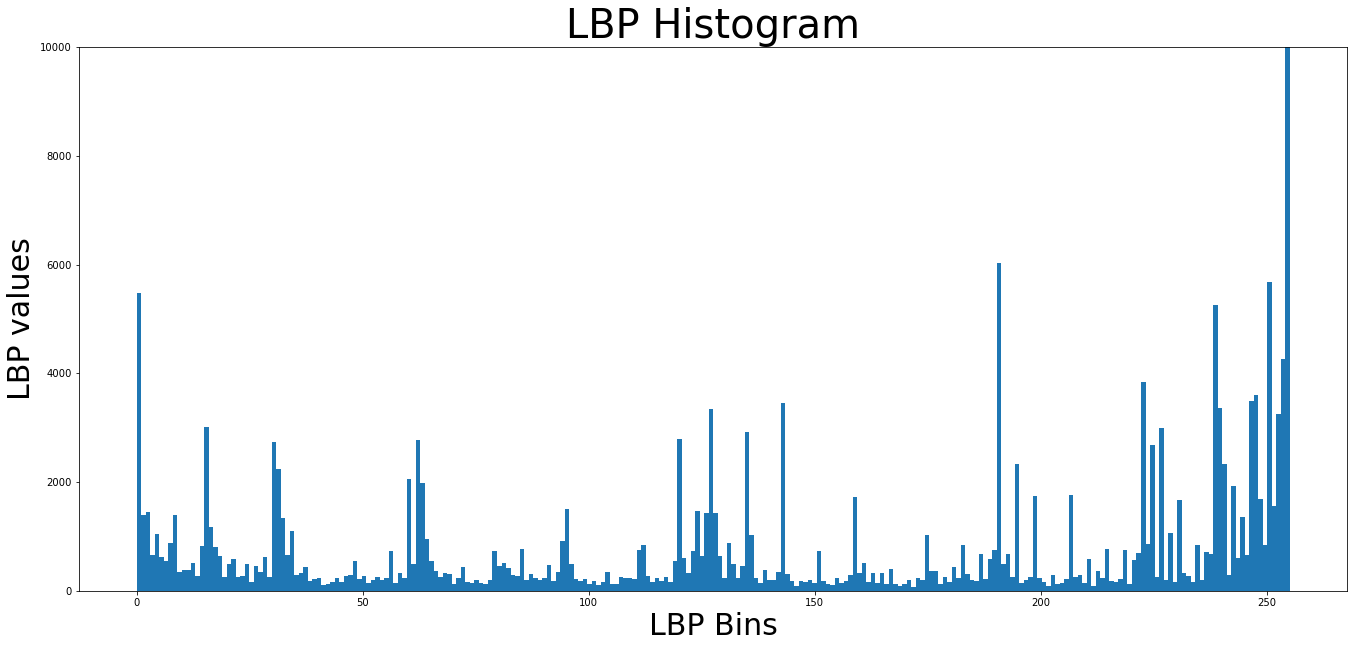

In [8]:
# CELL4 – 3 marks

def get_pixel(img, center, x, y):
     
    new_value = 0
     
    try:
        # If local neighbourhood pixel
        # value is greater than or equal
        # to center pixel values then
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
             
    except:
        # Exception is required when
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
     
    return new_value
  
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
  
    center = img[x][y]
  
    val_ar = []
     
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
     
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
     
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
     
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
     
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
     
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
     
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
     
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
      
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
  
    val = 0
     
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
         
    return val


img=imread('m1.png')*255


height, width= img.shape
  
  
# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)

  
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img, i, j)


fig = plt.figure(figsize=(50,10))
ax  = fig.add_subplot(121)

vecimgLBP = img_lbp.flatten()
freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
ax.set_ylim(0,10000)
lbp = lbp[:-1]

ax.set_title("LBP Histogram", fontsize=40)

plt.xlabel('LBP Bins', fontsize=30).set_color('black')
plt.ylabel('LBP values', fontsize=30).set_color('black')

print('NOTE,the work is based on the alternative LBP calculation')    
plt.show()

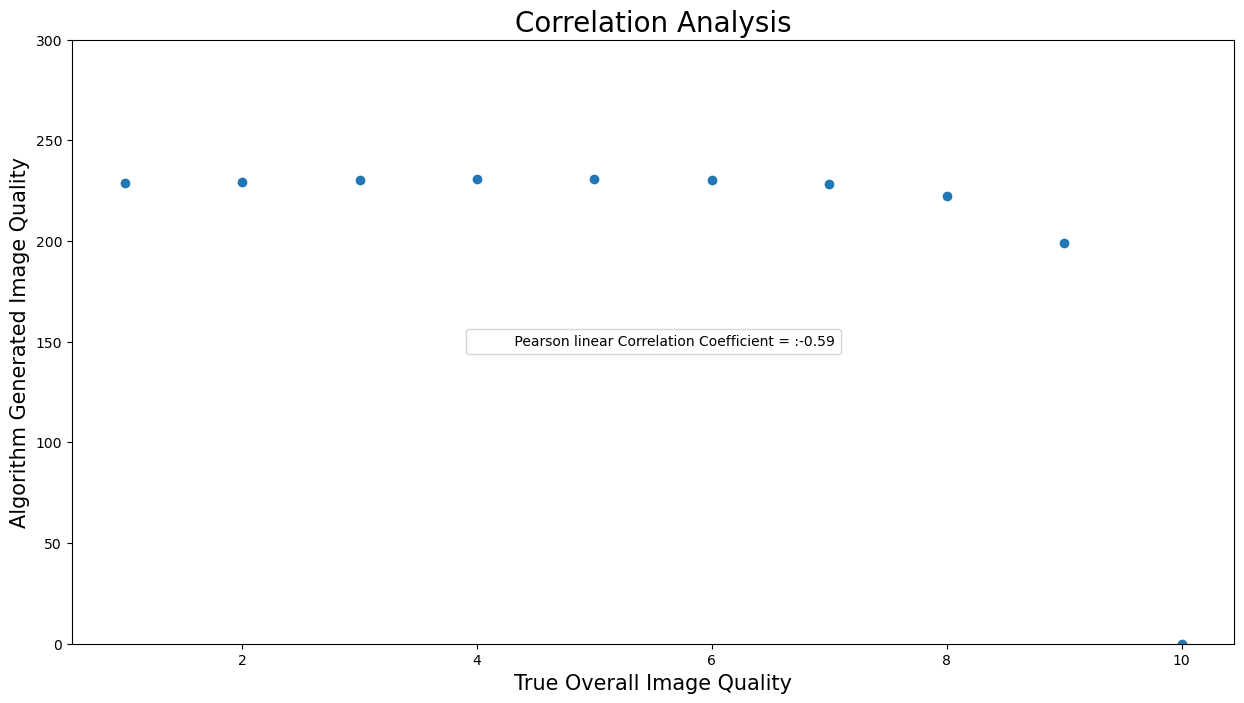

Interpretation: A negative correlation indicates two variables that tend to move in opposite directions


In [11]:
# CELL5 – 4 marks
import scipy
from scipy.spatial import distance

refrence_img= imread('m1.png')*255
test_img= imread('m4.png')*255


def normalize(a):
    # Normalised [0,1]
    b = (a - np.min(a))/np.ptp(a)
    return b

def Image_Quality_Assessor(img1,img2):
    height, width= img1.shape

    img1_lbp = np.zeros((height, width),np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img1_lbp[i, j] = lbp_calculated_pixel(img1, i, j)
            
    img2_lbp = np.zeros((height, width),np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img2_lbp[i, j] = lbp_calculated_pixel(img2, i, j)
            
    LBPH1 = img1_lbp.flatten()
    LBPH2 = img2_lbp.flatten()  
    
    p= normalize(LBPH1)
    q= normalize(LBPH2)

    dst = distance.euclidean(p, q)
    return round(dst,2)

ImgLst=['m1.png','m2.png','m3.png','m4.png','m5.png','m6.png','m7.png','m8.png','m9.png','m10.png']
IQA_values=[]
for i in range(len(ImgLst)):
    value = Image_Quality_Assessor(refrence_img,imread(ImgLst[i])*255)
    IQA_values.append(value)
    
dataf = pd.read_excel('Q_scores.xlsx', index_col=0)
True_Quality= dataf.values.flatten()

plt.scatter(True_Quality, IQA_values)
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})

ax = plt.gca()
ax.set_ylim([0, 300])

plt.xlabel('True Overall Image Quality', fontsize=15)
plt.ylabel('Algorithm Generated Image Quality', fontsize=15)
scipy.stats.pearsonr(True_Quality, IQA_values)

motto = stats.pearsonr(True_Quality, IQA_values)
list(motto)

plt.title("Correlation Analysis", fontsize=20)
    

plt.legend([" Pearson linear Correlation Coefficient = :{0}".format(round(motto[0], 2))],loc="center",markerscale=0)
plt.show() 

print ("Interpretation: A negative correlation indicates two variables that tend to move in opposite directions")

Text(0.5, 1.0, 'Model Performance at each combination')

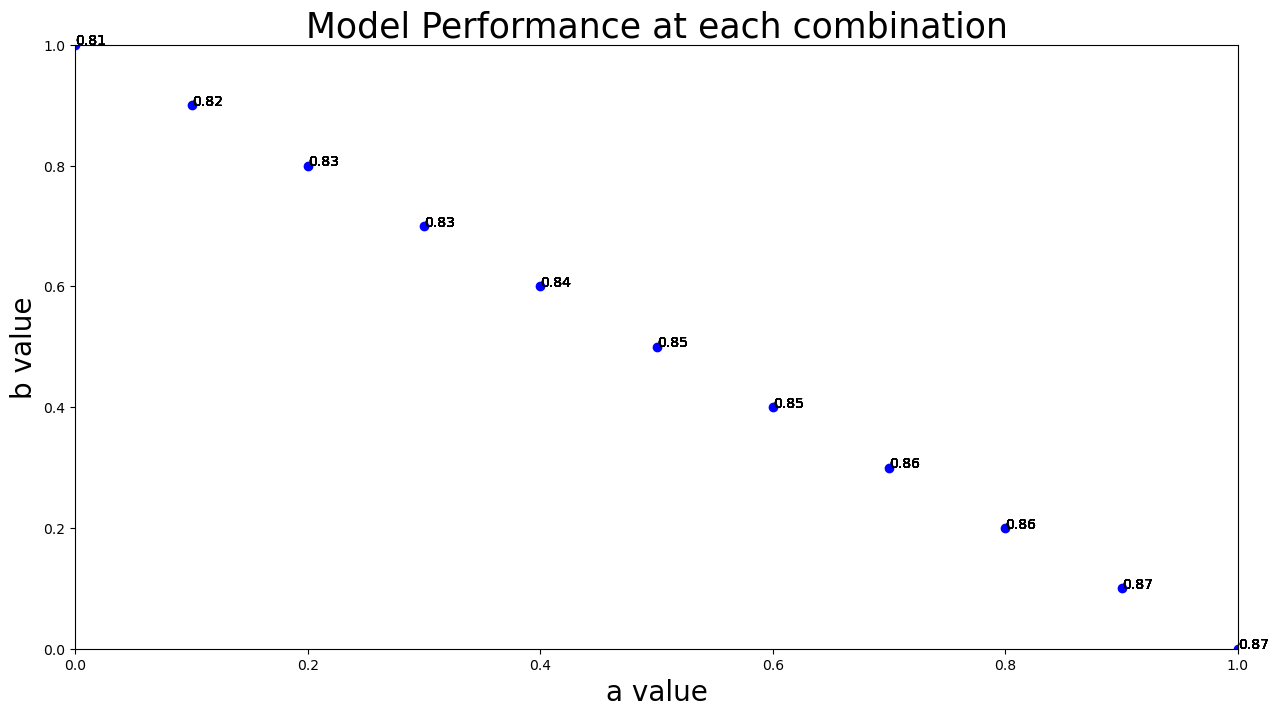

In [12]:
# CELL6 – 3 marks

def IQA_Alternative(img,a,b):
    AP= np.mean(img)
    MP= np.median(img)
    IQ_p = a*AP + b*MP
    return IQ_p

def Get_Performance_one_comb(ImgLst,True_Quality_lst,a,b):
    IQP_imgs_values = []
    for i in range(len(ImgLst)):
        img = imread(ImgLst[i])*255
        IQ_p = IQA_Alternative(img,a,b)
        IQP_imgs_values.append(IQ_p)
        
    motto = stats.pearsonr(True_Quality_lst, IQP_imgs_values)
    list(motto)
    performance = round(motto[0], 2)
    return performance

def Comb_Performance(ImgLs,True_Quality_lst):
    Comb= []
    performance_lst= []
    Space = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    combinations = [(x,y) for x in Space for y in Space if x+y==1]
    for j in range(len(combinations)):
        a,b= combinations[j]
        performance = Get_Performance_one_comb(ImgLst,True_Quality_lst,a,b)
        Comb.append(combinations[j])
        performance_lst.append(performance)
             
    return Comb,performance_lst

True_Quality_lst = [10,9,8,7,6,5,4,3,2,1]
ImgLst=['m1.png','m2.png','m3.png','m4.png','m5.png','m6.png','m7.png','m8.png','m9.png','m10.png']

Comb,performance_lst = Comb_Performance(ImgLst,True_Quality_lst)

dict_Comb_performance = dict(zip(Comb, performance_lst))


for i in range(len(Comb)):
    x = Comb[i][0]
    y = Comb[i][1]
    for label in enumerate (performance_lst):
        plt.annotate(str(dict_Comb_performance[(x,y)]), (Comb[i][0], Comb[i][1]))
    plt.plot(x, y, 'bo')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('a value', fontsize=20)
plt.ylabel('b value', fontsize=20)
plt.title('Model Performance at each combination', fontsize=25)